<a href="https://colab.research.google.com/github/kimdesok/FinanceDataReader/blob/master/BondYields.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#API key from the US Fiscal data site 
# 0c62130f938c570fcdf5f817d965907c

In [3]:
!pip install -U pykrx

from pykrx import stock
from pykrx import bond


     |████████████████████████████████| 92 kB 257 kB/s 
     |████████████████████████████████| 51 kB 370 kB/s 
     |████████████████████████████████| 251 kB 32.4 MB/s 


In [4]:
!pip install -U finance-dataReader
import FinanceDataReader as fdr

     |████████████████████████████████| 48 kB 2.5 MB/s 


In [17]:
from matplotlib.ticker import IndexFormatter
from pandas.core.frame import DataFrame
from datetime import date, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


def bond_graph(df, ax1, bToday=False):
  #Things to do.  The type of the available bonds changes depending on the time period. So the index must be adjusted accordingly.
  try:
    df.rename({df.columns[0]:'Yield', df.columns[1]: 'Ratio'}, axis=1, inplace=True)
  except:
    print("Empty dataframe")
    return
    
  bond_index = {'국고채 1년':'1yrBond', '국고채 2년':'2yrBond', '국고채 3년':'3yrBond', '국고채 5년':'5yrBond', \
                  '국고채 10년':'10yrBond', '국고채 20년':'20yrBond', '국고채 30년':'30yrBond'}
    
  #To read in the index available for the period (given in the input dataframe)
  dfx=[]  # retrievable bond yields
  dfy={}  # retrievable bond index
  for idx in df.index:
    try:
      dfy[idx] = bond_index[idx]
      dfx.append(idx)
    except:
      pass
  #print(dfx)
  df = df.loc[dfx]

  #To rename the index and its column name in English to avoid a font problem
  #print(dfy)
  df.rename(index=dfy, inplace=True)
  df.rename_axis('Bond Types', inplace=True)

  #To assign the row with the valid data to a new dataframe (by dropping the index with the zero data)
  df = df.loc[~(df==0).all(axis=1)]

  #print(df.head())
  
  #To highlight the plot line for the last day in the input period
  if(bToday==True):
    print('Last day drawing in bold')
    df['Yield'].plot(ax=ax1, marker='o', linewidth=4, color='red')
  else:
    df['Yield'].plot(ax=ax1, marker='o', linewidth=2)
    
def bond_yield_graphs(start_date, end_date):

  print('\n')
  print('Displaying the data from ', start_date, 'to ', end_date, '\n')
  
  fig, ax1 = plt.subplots(figsize=(20, 10))

  #Generating the dates in timeseries
  dates = (start_date + timedelta(idx + 1) for idx in range((end_date - start_date).days))
  
  plt.rcParams.update({'font.size': 22})

  for idx in dates:
    str_idx = idx.strftime('%Y%m%d')
    #print(str_idx)
    try:
      df = bond.get_otc_treasury_yields(str_idx)
    except:
      print("The data retrieval on " + str_idx + " is failed.")
      break
    
    #print('df =', '\n', df.head())

  #Plot the graphs for the input period
    bond_graph(df, ax1)
    #break

  #Plot the graph for the last day in red thicker line
  #end_date = end_date.strftime('%Y%m%d')
  try:
      df_today = bond.get_otc_treasury_yields(end_date.strftime('%Y%m%d'))
  except:
      print("Today data is failed.")
      return

  #print("df_today = ", '\n', df_today.head(10))
 
  bond_graph(df_today, ax1, True)

  plt.ylabel('Yields')
  plt.title('s. Korean Bond Yields from ' + str(start_date) + ' to ' + str(end_date))
  #plt.legend(loc='lower right')
  plt.grid(True)
  plt.show()
  plt.close()



Displaying the data from  2022-03-30 to  2022-04-18 

['국고채 1년', '국고채 2년', '국고채 3년', '국고채 5년', '국고채 10년', '국고채 20년', '국고채 30년']
['국고채 1년', '국고채 2년', '국고채 3년', '국고채 5년', '국고채 10년', '국고채 20년', '국고채 30년']
['국고채 1년', '국고채 2년', '국고채 3년', '국고채 5년', '국고채 10년', '국고채 20년', '국고채 30년']
['국고채 1년', '국고채 2년', '국고채 3년', '국고채 5년', '국고채 10년', '국고채 20년', '국고채 30년']
['국고채 1년', '국고채 2년', '국고채 3년', '국고채 5년', '국고채 10년', '국고채 20년', '국고채 30년']
['국고채 1년', '국고채 2년', '국고채 3년', '국고채 5년', '국고채 10년', '국고채 20년', '국고채 30년']
['국고채 1년', '국고채 2년', '국고채 3년', '국고채 5년', '국고채 10년', '국고채 20년', '국고채 30년']
['국고채 1년', '국고채 2년', '국고채 3년', '국고채 5년', '국고채 10년', '국고채 20년', '국고채 30년']
['국고채 1년', '국고채 2년', '국고채 3년', '국고채 5년', '국고채 10년', '국고채 20년', '국고채 30년']
['국고채 1년', '국고채 2년', '국고채 3년', '국고채 5년', '국고채 10년', '국고채 20년', '국고채 30년']
['국고채 1년', '국고채 2년', '국고채 3년', '국고채 5년', '국고채 10년', '국고채 20년', '국고채 30년']
['국고채 1년', '국고채 2년', '국고채 3년', '국고채 5년', '국고채 10년', '국고채 20년', '국고채 30년']
['국고채 1년', '국고채 2년', '국고채 3년', '국고채 5년', '국고채 10년', '국고채

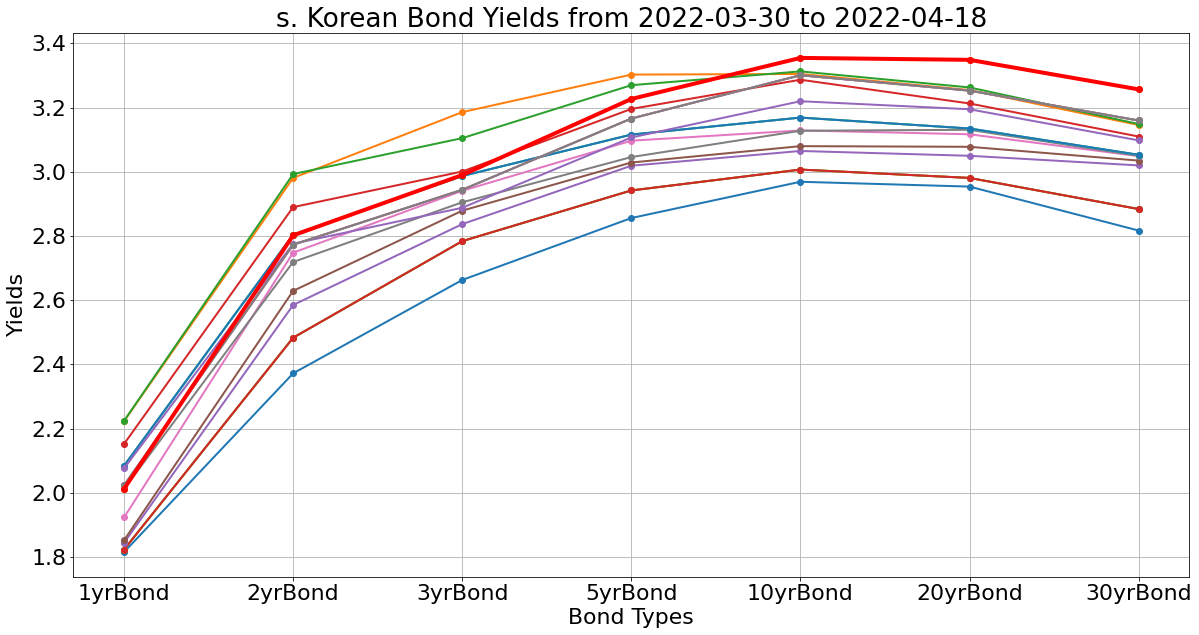

In [15]:
bond_yield_graphs(date(2022,3,30),  date.today())



Displaying the data from  2007-11-30 to  2008-01-05 

['국고채 1년', '국고채 3년', '국고채 5년', '국고채 10년', '국고채 20년', '국고채 30년']
['국고채 1년', '국고채 3년', '국고채 5년', '국고채 10년', '국고채 20년', '국고채 30년']
['국고채 1년', '국고채 3년', '국고채 5년', '국고채 10년', '국고채 20년', '국고채 30년']
['국고채 1년', '국고채 3년', '국고채 5년', '국고채 10년', '국고채 20년', '국고채 30년']
['국고채 1년', '국고채 3년', '국고채 5년', '국고채 10년', '국고채 20년', '국고채 30년']
['국고채 1년', '국고채 3년', '국고채 5년', '국고채 10년', '국고채 20년', '국고채 30년']
['국고채 1년', '국고채 3년', '국고채 5년', '국고채 10년', '국고채 20년', '국고채 30년']
['국고채 1년', '국고채 3년', '국고채 5년', '국고채 10년', '국고채 20년', '국고채 30년']
['국고채 1년', '국고채 3년', '국고채 5년', '국고채 10년', '국고채 20년', '국고채 30년']
['국고채 1년', '국고채 3년', '국고채 5년', '국고채 10년', '국고채 20년', '국고채 30년']
['국고채 1년', '국고채 3년', '국고채 5년', '국고채 10년', '국고채 20년', '국고채 30년']
['국고채 1년', '국고채 3년', '국고채 5년', '국고채 10년', '국고채 20년', '국고채 30년']
['국고채 1년', '국고채 3년', '국고채 5년', '국고채 10년', '국고채 20년', '국고채 30년']
['국고채 1년', '국고채 3년', '국고채 5년', '국고채 10년', '국고채 20년', '국고채 30년']
['국고채 1년', '국고채 3년', '국고채 5년', '국고채 10년', '국고채 2

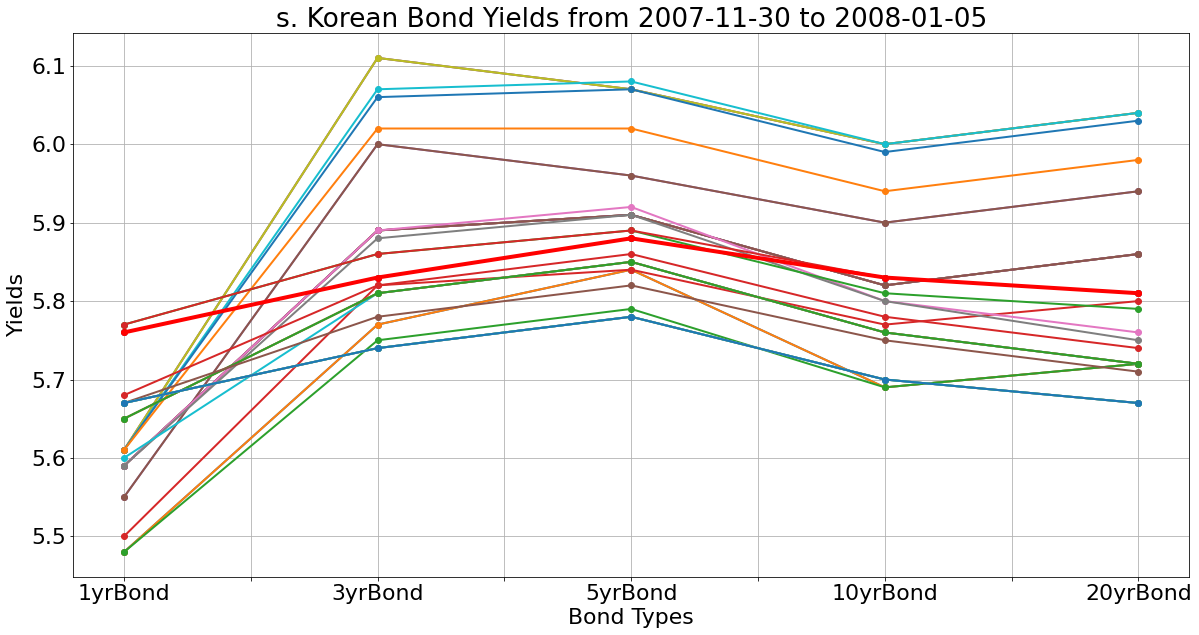

In [16]:
bond_yield_graphs(date(2007,11,30),  date(2008,1,5))

## Plotting the bond yields by the types in timeseries
>* types: 1, 2, 3, 5, 10, 20 , and 30 years
>* issues: Before 2020, no data for the 2 year bond available

In [28]:
def timeseries_bond_yield_graphs(start_date, end_date):

  #things to do - plot with KOSPI index

  print('Plotting from', start_date, ' to ', end_date, '\n')

  start_date = start_date.strftime('%Y%m%d')
  end_date = end_date.strftime('%Y%m%d')

  print('\n')
  
  df = pd.DataFrame()

  yields = {'국고채1년':'1yrBond', '국고채2년':'2yrBond', '국고채3년':'3yrBond', '국고채5년':'5yrBond', '국고채10년':'10yrBond', '국고채20년':'20yrBond', '국고채30년':'30yrBond'}

  df_list={}
  new_bond_index = {}
  for idy, idx in yields.items():  
      try:
        df_list[idx] = bond.get_otc_treasury_yields(start_date, end_date, idy)['수익률']
        new_bond_index[idx] = idy # bond_index is updated by dropping the data unavailable for the input period
      except:
        pass
  
  print('no indexes = ', len(df_list))

  #To generate yield difference graphs from the indexes available for the period (given in the input dataframe) 
  #assuming the ten year bond data is always available.

  labelGraphs = []
  try:
    df['10yr-1yr'] = (df_list['10yrBond'] - df_list['1yrBond'])
    labelGraphs.append('10yr-1yr')
  except:
    pass
  try:
    df['10yr-2yr'] = (df_list['10yrBond'] - df_list['2yrBond'])
    labelGraphs.append('10yr-2yr')
  except:
    pass
  try:
    df['10yr-3yr'] = (df_list['10yrBond'] - df_list['3yrBond'])
    labelGraphs.append('10yr-3yr')
  except:
    pass
  print('labels = ',  labelGraphs )
  print(df.head())
  df.index.names = ['Date']
  print(df.tail(1))

  #Plotting
  plt.rcParams.update({'font.size': 22})
  fig, ax1 = plt.subplots(figsize=(16, 10))

  #Yield difference graphs on the primary axis
  for idx in range(len(labelGraphs)):
    #print(labelGraphs[idx])
    df[labelGraphs[idx]].plot(ax=ax1, linewidth=2, marker = 'o')
  
  plt.xticks(rotation=45)
  plt.ylabel('Yields')
  plt.title('s. Korean Bond Yield Difference Graphs')
  plt.legend()
  plt.grid(True)
  plt.show()  # show the plot
  plt.close()  # close the plot space

Plotting from 2022-01-01  to  2022-04-18 



no indexes =  7
labels =  ['10yr-1yr', '10yr-2yr', '10yr-3yr']
            10yr-1yr  10yr-2yr  10yr-3yr
일자                                      
2022-01-03     0.962     0.615     0.470
2022-01-04     0.950     0.603     0.452
2022-01-05     1.034     0.584     0.462
2022-01-06     1.087     0.603     0.468
2022-01-07     1.061     0.563     0.443
            10yr-1yr  10yr-2yr  10yr-3yr
Date                                    
2022-04-18     1.343     0.553     0.365


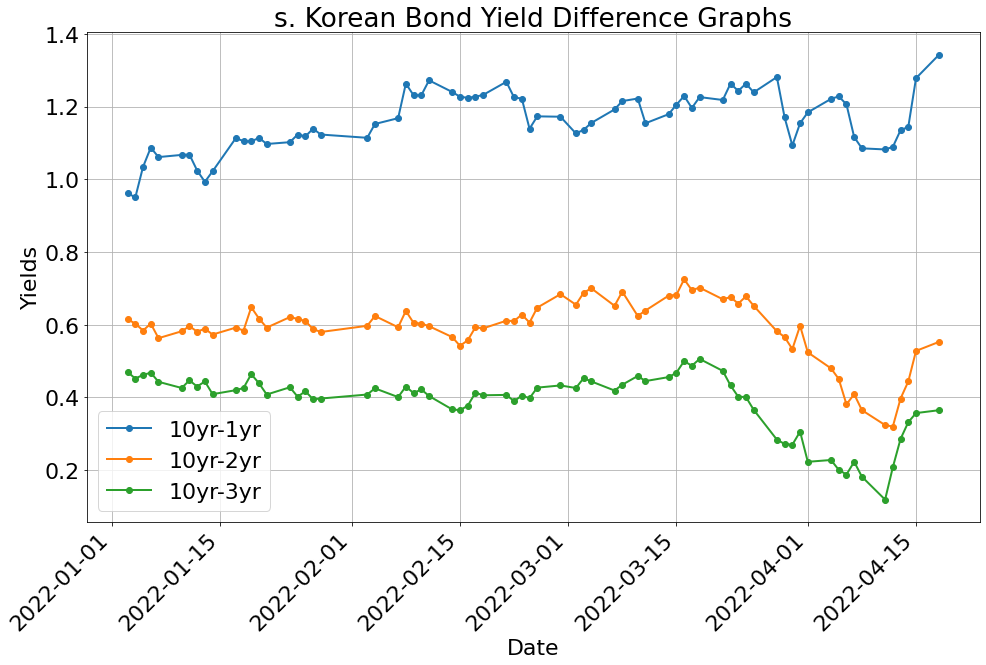

In [29]:
timeseries_bond_yield_graphs(date(2022,1,1),  date.today())

Plotting from 2019-06-01  to  2020-06-01 



no indexes =  6
labels =  ['10yr-1yr', '10yr-3yr']
            10yr-1yr  10yr-3yr
일자                            
2019-06-03     0.072     0.116
2019-06-04     0.068     0.114
2019-06-05     0.059     0.112
2019-06-07     0.061     0.119
2019-06-10     0.069     0.128
            10yr-1yr  10yr-3yr
Date                          
2020-06-01     0.706     0.564


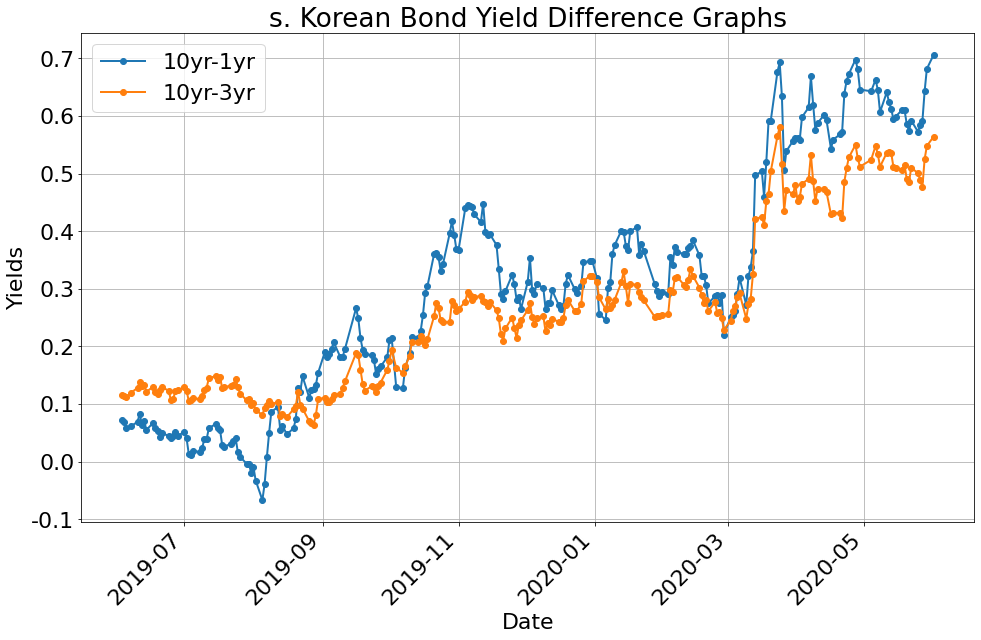

In [32]:
timeseries_bond_yield_graphs(date(2019,6,1),  date(2020,6,1))

Plotting from 2007-01-01  to  2008-01-01 



no indexes =  6
labels =  ['10yr-1yr', '10yr-3yr']
            10yr-1yr  10yr-3yr
일자                            
2007-01-02      0.10      0.13
2007-01-03      0.08      0.12
2007-01-04      0.08      0.12
2007-01-05      0.07      0.12
2007-01-08      0.07      0.11
            10yr-1yr  10yr-3yr
Date                          
2007-12-31      0.03     -0.04


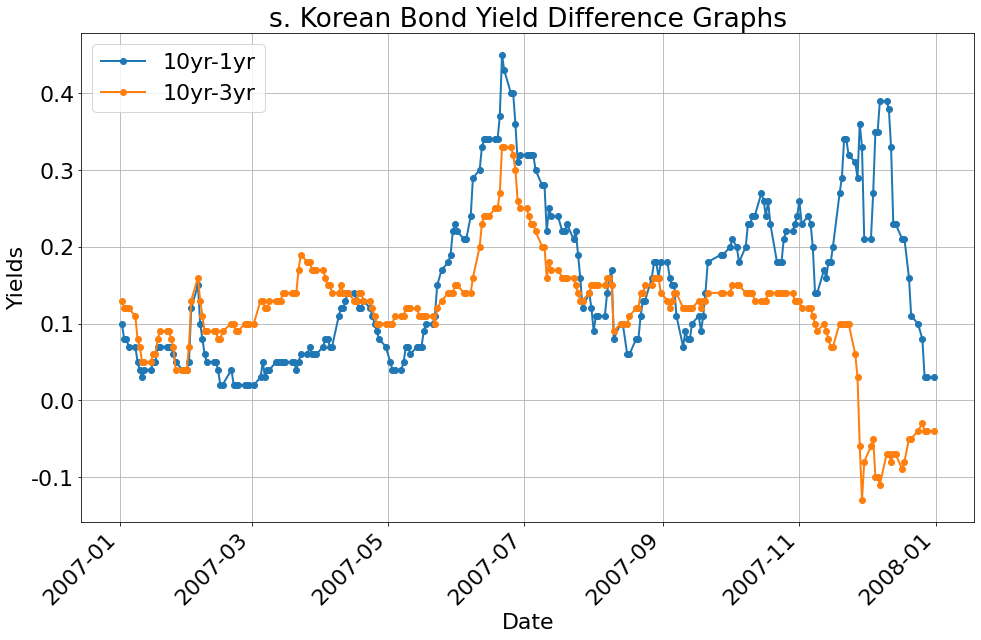

In [30]:
timeseries_bond_yield_graphs(date(2007,1,1), date(2008,1,1))

In [23]:
def us_timeseries_bond_yield_graphs(start_date, end_date):
  print('Plotting from', start_date, ' to ', end_date)

  #S&P 500 Close
  df = fdr.DataReader('US500', start_date, end_date)
  #df.info()

  df = df.pivot_table(index='Date', values=['Close'])

  bond_index = {'three_m':'US3MT=X', 'one_yr': 'US1YT=X', 'two_yr':'US2YT=X', \
                'five_yr':'US5YT=X', 'ten_yr':'US10YT=X', 'twenty_yr':'US20YT=X', 'thirty_yr':'US30YT=X'}
  
  #To read in the bond Yields
  df_list={}
  new_bond_index = {}
  for idx, idy in bond_index.items():
    try:
      df_list[idx]=fdr.DataReader(idy, start_date, end_date)['Close']
      new_bond_index[idx] = idy # bond_index is updated by dropping the data unavailable for the input period
    except:
      pass

  print('no indexes = ', len(df_list))

  #To generate yield difference graphs from the indexes available for the period (given in the input dataframe) 
  #assuming the ten year bond data is always available.
  labelGraphs = []

  try:
    df['ten_yr - 3m'] = (df_list['ten_yr'] - df_list['three_m'])
    labelGraphs.append('ten_yr - 3m')
  except:
    pass
  try:
    df['ten_yr - 1yr'] = (df_list['ten_yr'] - df_list['one_yr'])
    labelGraphs.append('ten_yr - 1yr')
  except:
    pass
  try:
    df['ten_yr - 2yr'] = (df_list['ten_yr'] - df_list['two_yr'])
    labelGraphs.append('ten_yr - 2yr')
  except:
    pass
  print('labels = ',  labelGraphs )
  print(df.head())

  #Plotting
  fig, ax1 = plt.subplots(figsize=(16, 10))
  plt.rcParams.update({'font.size': 22})

  #Yield difference graphs on the primary axis
  for idx in range(len(labelGraphs)):
    print(labelGraphs[idx])
    df[labelGraphs[idx]].plot(ax=ax1, linewidth=2, marker = 'o', secondary_y=labelGraphs)
  
  #S&P 500 on the secondary axis
  df.rename(columns= {'Close': 'S&P 500'}, inplace=True)
  print('labels = ',  labelGraphs )
  df['S&P 500'].plot(ax=ax1, linewidth=4, marker = 'o', color = 'blue', alpha=0.2)
  

  plt.ylabel('Yields')
  plt.title('SP&500 & the difference in short term and long term yields')
  plt.legend(loc='lower left')
  plt.grid(True)
  plt.show()
  plt.close()


  fig, ax2 = plt.subplots(figsize=(16, 10))
  df1 = DataFrame()
  for idx, idy in new_bond_index.items():
    df1[idx] = df_list[idx]


  df1 = df1.T
  #print(df1.head())
  
  df1.plot(ax=ax2, linewidth=2,legend=None, alpha=0.5)

  df1.iloc[:,-1].plot(ax=ax2, linewidth=4,legend=None, color='red', marker='o')

  print(df1.columns[-32], df1.iloc[:,-3])
  print(df1.columns[-2], df1.iloc[:,-2])
  print(df1.columns[-1], df1.iloc[:,-1])

  plt.ylabel('Yields')
  plt.title('US Bond Yields from ' + str(start_date) + ' to ' + str(end_date))
  plt.grid(True)
  plt.show()
  plt.close()



Plotting from 1998-01-01  to  2001-12-01
no indexes =  5
labels =  ['ten_yr - 3m', 'ten_yr - 2yr']
            Close  ten_yr - 3m  ten_yr - 2yr
Date                                        
1998-01-02  975.0        0.353         0.073
1998-01-05  977.1        0.293         0.054
1998-01-06  966.6        0.269         0.077
1998-01-07  964.0        0.324         0.122
1998-01-08  956.0        0.408         0.166
ten_yr - 3m
ten_yr - 2yr
labels =  ['ten_yr - 3m', 'ten_yr - 2yr']


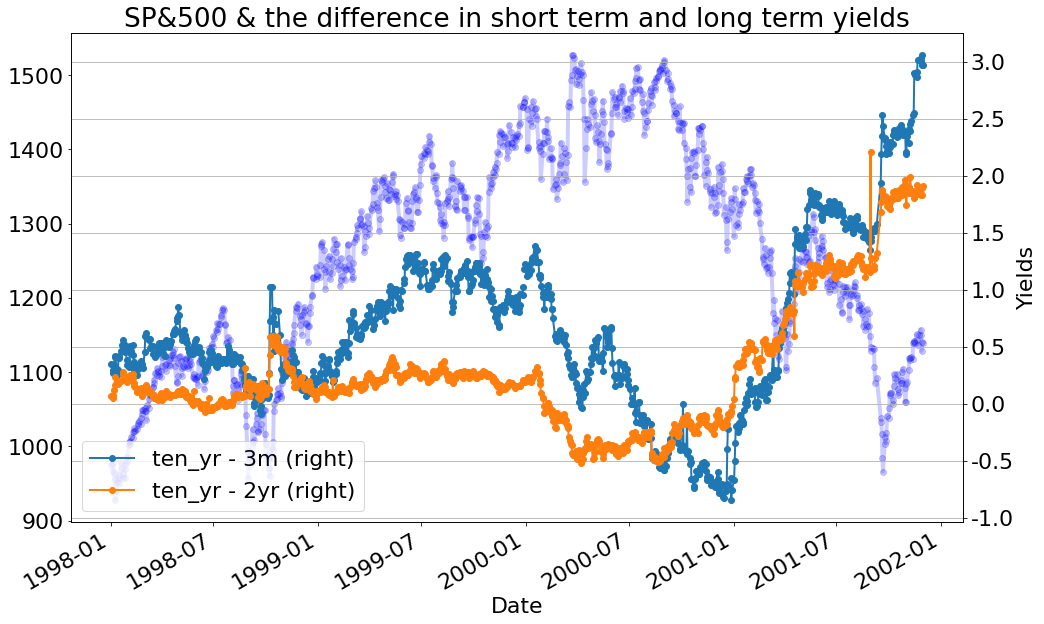

2001-10-16 00:00:00 three_m      1.869
two_yr       3.102
five_yr      4.294
ten_yr       4.929
thirty_yr    5.356
Name: 2001-11-28 00:00:00, dtype: float64
2001-11-29 00:00:00 three_m      1.797
two_yr       2.870
five_yr      4.100
ten_yr       4.765
thirty_yr    5.242
Name: 2001-11-29 00:00:00, dtype: float64
2001-11-30 00:00:00 three_m      1.782
two_yr       2.846
five_yr      4.061
ten_yr       4.754
thirty_yr    5.286
Name: 2001-11-30 00:00:00, dtype: float64


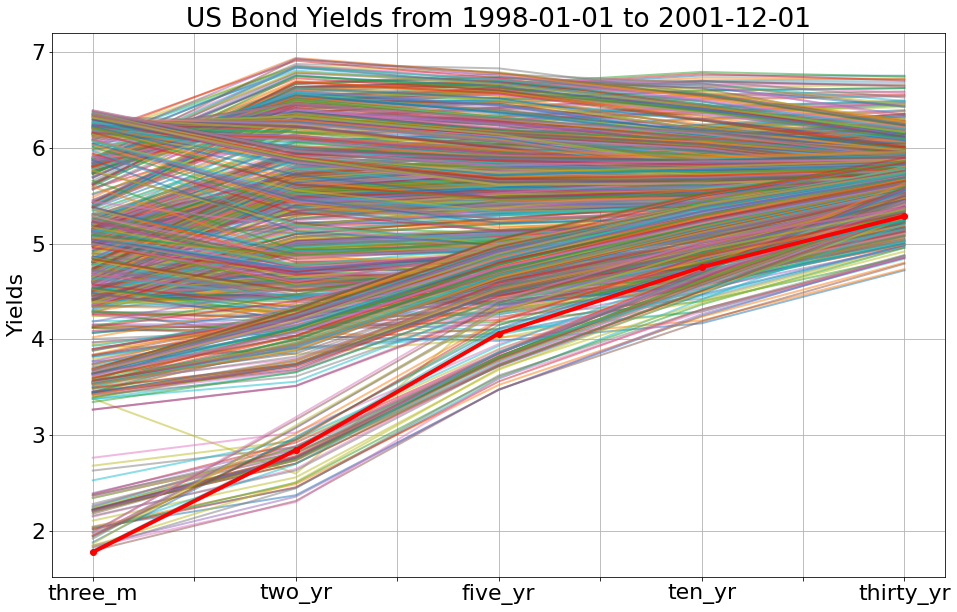

In [24]:
us_timeseries_bond_yield_graphs('1998-01-01',  '2001-12-01')

In [ ]:
us_timeseries_bond_yield_graphs('2018-01-01',  '2020-01-01')

Plotting from 2022-01-01  to  2022-04-18
no indexes =  7
labels =  ['ten_yr - 3m', 'ten_yr - 1yr', 'ten_yr - 2yr']
              Close  ten_yr - 3m  ten_yr - 1yr  ten_yr - 2yr
Date                                                        
2022-01-03  4796.56        1.574         1.240        0.8612
2022-01-04  4793.54        1.563         1.273        0.8891
2022-01-05  4700.58        1.609         1.296        0.8704
2022-01-06  4696.05        1.627         1.296        0.8544
2022-01-07  4677.02        1.669         1.348        0.8949
ten_yr - 3m
ten_yr - 1yr
ten_yr - 2yr
labels =  ['ten_yr - 3m', 'ten_yr - 1yr', 'ten_yr - 2yr']


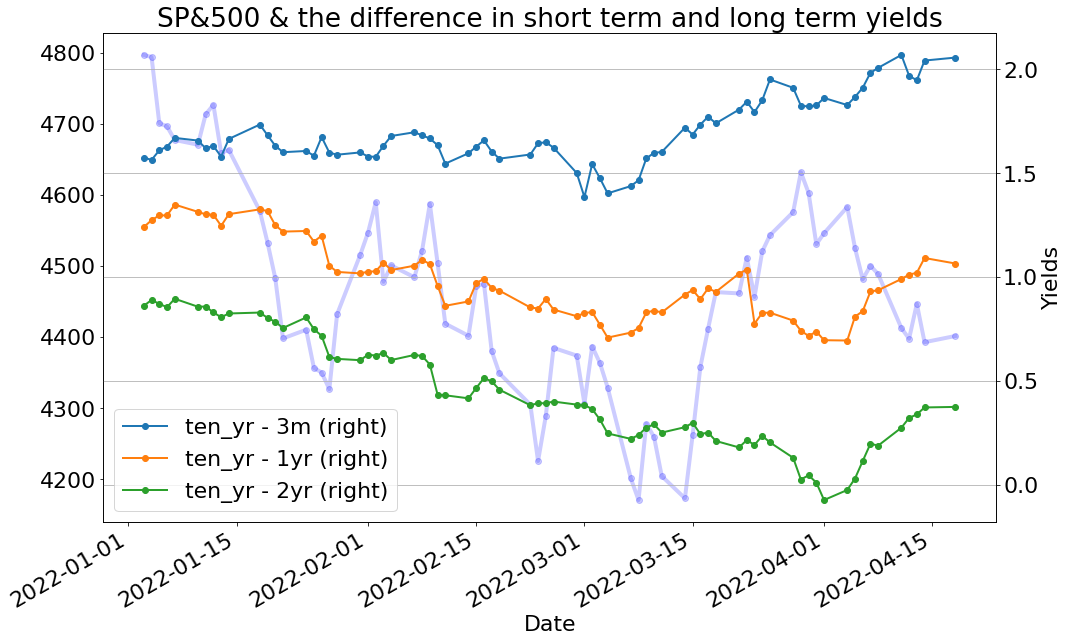

2022-03-11 00:00:00 three_m      0.7870
one_yr       1.7370
two_yr       2.4560
five_yr      2.7855
ten_yr       2.8280
twenty_yr    3.0993
thirty_yr    2.9190
Name: 2022-04-14 00:00:00, dtype: float64
2022-04-17 00:00:00 three_m      0.8000
one_yr       1.7083
two_yr       2.4849
five_yr      2.8060
ten_yr       2.8470
twenty_yr    3.1175
thirty_yr    2.9400
Name: 2022-04-17 00:00:00, dtype: float64
2022-04-18 00:00:00 three_m      0.7796
one_yr       1.7705
two_yr       2.4604
five_yr      2.7685
ten_yr       2.8350
twenty_yr    3.1210
thirty_yr    2.9360
Name: 2022-04-18 00:00:00, dtype: float64


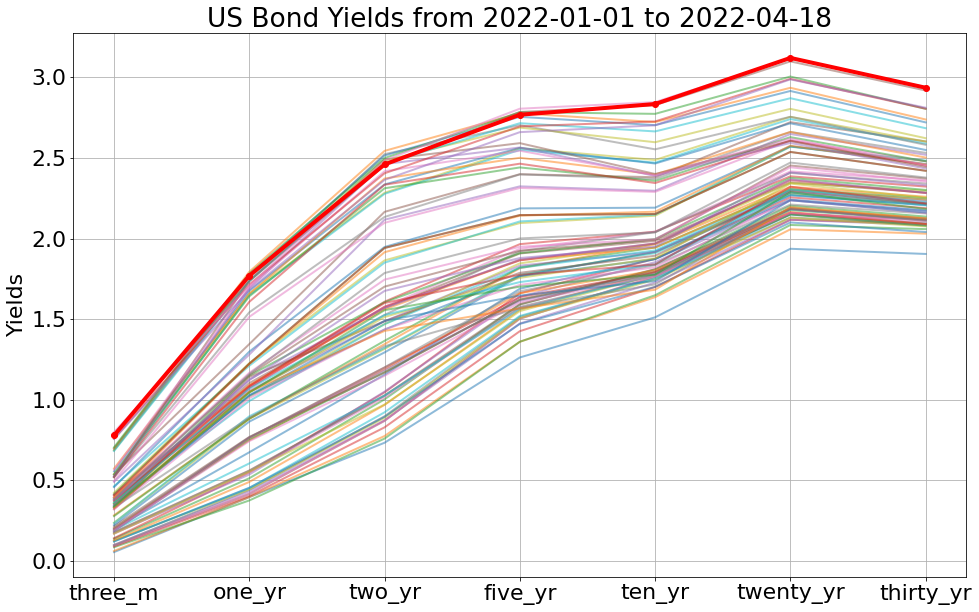

In [25]:
us_timeseries_bond_yield_graphs('2022-01-01',  date.today())

##Errors in fdr.DataReader('KR1YT=RR)
>* It does not return the correct bond yield.
>* For the time being, the DataReader should NOT be used for the bond data retrieval. Useless.


In [ ]:
#s. Korean bond market
# Syntax 'KRNYT=RR' N= 1,2,3,4,5,10,20,30,50

def k_bond_yield_graphs(start_date, end_date):
  print('Plotting from', start_date, ' to ', end_date)

  #S&P 500 Close
  df = fdr.DataReader('KS11', start_date, end_date)
  #df.info()

  df = df.pivot_table(index='Date', values=['Close'])
  
  #Bond Yields
  short_df = fdr.DataReader('KR1YT=RR', start_date, end_date)
  #three_m_df.info()
  ten_y_df = fdr.DataReader('KR10YT=RR', start_date, end_date)
  #ten_y_df.info()
  ten2_y_df = fdr.DataReader('KR20YT=RR', start_date, end_date)
  ten3_y_df = fdr.DataReader('KR30YT=RR', start_date, end_date)

  try:
    df['dy0'] = (ten_y_df['Close'] - short_df['Close']).rolling(5).mean()
  except:
    pass
  try:
    df['dy1'] = (ten2_y_df['Close'] - short_df['Close']).rolling(5).mean()
  except:
    pass
  try:
    df['dy2'] = (ten3_y_df['Close'] - short_df['Close']).rolling(5).mean()
  except:
    pass
  
  #df['dy1_df'] = ten_y_df - one_y_df

  df.rename(columns= {'Close': 'KOSPI', 'dy0':'10 yr - 1 yr yields'}, inplace=True)
  #df.info()

  #Plotting
  fig, ax1 = plt.subplots(figsize=(16, 10))
  
  df.plot(ax=ax1, linewidth=2, secondary_y=['10 yr - 1 yr yields', 'dy1', 'dy2'])



  plt.ylabel('Yields')
  #plt.title('SP&500 & 50 & 200 days ave. along with the difference in short term and long term yields')
  plt.title('KOSPI & the difference in short term and long term yields')
  plt.legend(loc='lower right')
  plt.grid(True)
  plt.show()
  plt.close()

  #plt.figure.figsize = (25,5)
  #three_m_df.plot(label='Three month Bond')
  #one_y_df.plot(label='One year Bond')
  #five_y_df.plot(label='Five year Bond')
  #ten_y_df.plot(label='Ten year Bond')
  #plt.legend()
  #plt.grid(True)
  #plt.show()
  #plt.close()


  #df.to_csv('out.csv')

#bond_yield_graphs('2020-01-01',  date.today())

In [ ]:
def daily_bond_yield_graphs(start_date, end_date):
  print('\n')
  print('Plotting from', start_date, ' to ', end_date, '\n')

  #Bond Yields 1,2,3,4,5,10,20,30,50

  #plotting
  df = pd.DataFrame()

  try:
    df['1 yr'] = fdr.DataReader('KR1YT=RR', start_date, end_date)['Close']
  except:
    pass
  try:
    df['2 yr'] = fdr.DataReader('KR2YT=RR', start_date, end_date)['Close']
  except:
    pass
  try:
    df['3 yr'] = fdr.DataReader('KR3YT=RR', start_date, end_date)['Close']
  except:
    pass
  try:
    df['4 yr']  = fdr.DataReader('KR4YT=RR', start_date, end_date)['Close']
  except:
    pass
  try:
    df['5 yr'] = fdr.DataReader('KR5YT=RR', start_date, end_date)['Close']
  except:
    pass
  try:
    df['10 yr']  = fdr.DataReader('KR10YT=RR', start_date, end_date)['Close']
  except:
    pass
  try:
    df['20 yr']  = fdr.DataReader('KR20YT=RR', start_date, end_date)['Close']
  except:
    pass
  try:
    df['30 yr'] = fdr.DataReader('KR30YT=RR', start_date, end_date)['Close']
  except:
    pass
  try:
    df['50 yr']  = fdr.DataReader('KR50YT=RR', start_date, end_date)['Close']
  except:
    pass

  fig, ax1 = plt.subplots(figsize=(20, 10))
  df.plot(ax=ax1)

  plt.ylabel('Yields')
  plt.title('yields')
  #plt.legend(loc='lower right')
  plt.grid(True)
  plt.show()
  plt.close()